In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

In [3]:
# TODO more SOM analysis and cleanup
# TODO own implementation based off of https://github.com/JustGlowing/minisom

In [18]:
data = pd.read_csv('../dataset/mapped_data.csv', sep=',')
variable_names = data.columns.tolist()

# need to normalize data from SOMs
scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# TODO comparison between normalization techniques (try Z-score normalization next)

print(norm_data)

         price  edhrecRank  edhrecSaltiness  manaValue  rarity    artist  \
0     0.000032    0.369006         0.321429   0.636364    0.75  0.306569   
1     0.000064    0.369006         0.321429   0.636364    0.75  0.306569   
2     0.005955    0.369006         0.321429   0.636364    0.75  0.306569   
3     0.093322    0.369006         0.321429   0.636364    0.75  0.306569   
4     0.002881    0.369006         0.321429   0.636364    0.75  0.306569   
...        ...         ...              ...        ...     ...       ...   
9471  0.001409    0.211725         0.166667   0.090909    0.50  0.616788   
9472  0.000608    0.211725         0.166667   0.090909    0.50  0.616788   
9473  0.005699    0.211725         0.166667   0.090909    0.50  0.616788   
9474  0.003137    0.211725         0.166667   0.090909    0.50  0.616788   
9475  0.005410    0.211725         0.166667   0.090909    0.50  0.616788   

      finishes  currency  hasFoil  supertypes  hasNonFoil  gameAvailability  \
0       

In [5]:
# TODO try out non MINI, and other implementation 
som_size = 10
som = MiniSom(som_size, som_size, norm_data.shape[1], sigma=1.0, learning_rate=0.5)

som.train(norm_data.values, num_iteration=1000)

In [6]:
print(norm_data.shape[0])

9476


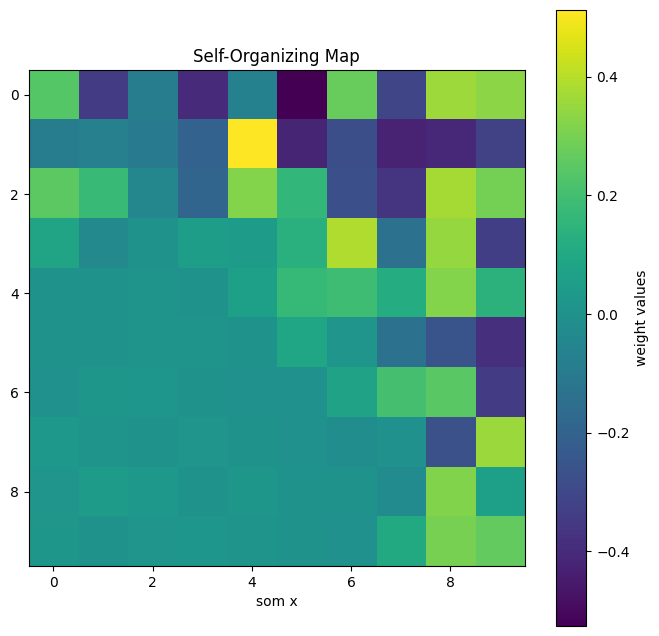

In [7]:
plt.figure(figsize=(8,8))
weights = som.get_weights()
plt.imshow(weights[:,:,0], interpolation='nearest', cmap='viridis')
plt.colorbar(label='weight values')
plt.title("Self-Organizing Map")
plt.xlabel("som x")
plt.show()


looks like there is some main clusters (yellow)

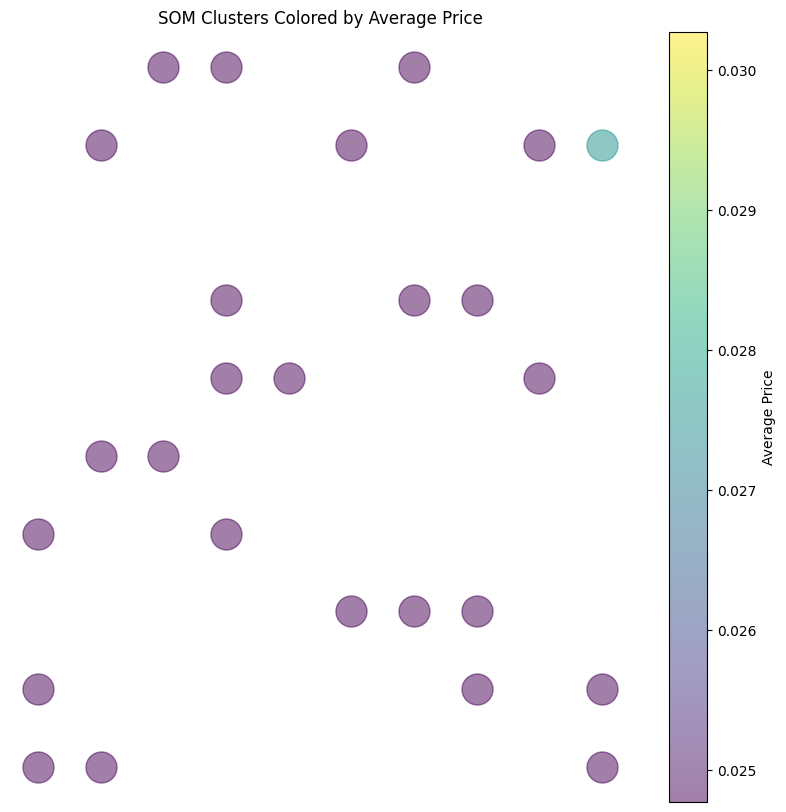

In [28]:
# Get the winning nodes for each data point
win_map = som.win_map(norm_data.values)

# Plot the SOM with color based on price
plt.figure(figsize=(10, 10))

for x in range(som_size):
    for y in range(som_size):
        # Get the points that map to this node
        points = win_map.get((x, y), [])
        
        # If there are points for this node, plot the average price
        if len(points) > 0:
            avg_price = np.mean(points, axis=0)[0]  # Get the mean of the price feature
            plt.scatter(x, y, c=avg_price, cmap='viridis', s=500, alpha=0.5)

plt.colorbar(label='Average Price')
plt.title('SOM Clusters Colored by Average Price')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.grid(False)
plt.axis('off')
plt.show()

In [1]:
# Create a DataFrame to hold mean weights for each SOM node

# Initialize and train the SOM
som = MiniSom(x=10, y=10, input_len=data.shape[1], sigma=1.0, learning_rate=0.5)
som.train(data, num_iteration=1000)

# Analyze feature planes and calculate cluster profiles
variable_names = [f'Variable {i+1}' for i in range(data.shape[1])]
win_map = som.win_map(data)

# Create a DataFrame to hold mean weights for each SOM node
cluster_profiles = {}
for (x, y), cluster_data in win_map.items():
    if len(cluster_data) > 0:  # Ensure there's data in the cluster
        cluster_profiles[(x, y)] = np.mean(cluster_data, axis=0)

# Convert to DataFrame
cluster_df = pd.DataFrame.from_dict(cluster_profiles, orient='index', columns=variable_names)

# Set up the figure for 10x10 pie charts
fig, axes = plt.subplots(10, 10, figsize=(20, 20))  # 10 rows, 10 columns


# Create pie charts for each cluster
for i in range(10):
    for j in range(10):
        ax = axes[i, j]
        if (i, j) in cluster_df.index:
            weights = cluster_df.loc[(i, j)]
            ax.pie(weights, labels=variable_names, autopct='%1.1f%%', startangle=90)
            ax.set_title(f'Cluster ({i},{j})')
        else:
            ax.axis('off')  # Turn off unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

NameError: name 'MiniSom' is not defined

In [9]:
# Create a DataFrame to store winning nodes and corresponding prices
price_data = []

for x in range(som_size):
    for y in range(som_size):
        # Get the points that map to this node
        points = win_map.get((x, y), [])
        
        if points:  # Check if there are points for this node
            # Compute the average price for this cluster
            avg_price = np.mean([point[0] for point in points])  # Assuming price is the first feature
            price_data.append({'Cluster': (x, y), 'Average Price': avg_price})

# Convert to DataFrame
price_df = pd.DataFrame(price_data)

print(price_df)

   Cluster  Average Price
0   (3, 0)       0.024899
1   (3, 1)       0.011437
2   (3, 2)       0.003880
3   (3, 3)       0.026593
4   (4, 0)       0.003887
5   (4, 2)       0.005122
6   (4, 3)       0.002696
7   (4, 4)       0.012420
8   (5, 0)       0.003625
9   (5, 1)       0.002377
10  (5, 2)       0.003291
11  (5, 3)       0.003723
12  (5, 4)       0.003807
13  (5, 6)       0.009748
14  (6, 0)       0.002707
15  (6, 2)       0.005284
16  (6, 3)       0.004698
17  (6, 4)       0.000885
18  (6, 5)       0.001683
19  (7, 1)       0.021622
20  (7, 2)       0.008466
21  (7, 4)       0.000903
22  (7, 5)       0.002288
23  (7, 6)       0.002164
24  (8, 0)       0.051525
25  (8, 1)       0.041225
26  (8, 2)       0.016893
27  (8, 3)       0.006955
28  (8, 4)       0.019309
29  (8, 5)       0.002586
30  (8, 6)       0.007159
31  (8, 7)       0.001902
32  (8, 8)       0.043075
33  (9, 0)       0.018531
34  (9, 1)       0.007586
35  (9, 2)       0.022923
36  (9, 3)       0.024462
37  (9, 5)  

In [15]:

cluster_profiles = {f'Cluster {i}': np.mean(win_map[i], axis=0) for i in win_map.keys()}

# Convert to DataFrame for easier analysis
cluster_df = pd.DataFrame.from_dict(cluster_profiles, orient='index', columns=[f'Variable {j+1}' for j in range(data.shape[1])])

# Display cluster profiles
print(cluster_df)


                                    Variable 1  Variable 2  Variable 3  \
Cluster (np.int64(9), np.int64(6))    0.000770    0.225999    0.150570   
Cluster (np.int64(9), np.int64(1))    0.007586    0.220790    0.152723   
Cluster (np.int64(8), np.int64(3))    0.006955    0.207405    0.158241   
Cluster (np.int64(7), np.int64(2))    0.008466    0.242747    0.149441   
Cluster (np.int64(9), np.int64(5))    0.001828    0.125624    0.301610   
Cluster (np.int64(9), np.int64(2))    0.022923    0.128796    0.266305   
Cluster (np.int64(9), np.int64(3))    0.024462    0.124456    0.305067   
Cluster (np.int64(7), np.int64(1))    0.021622    0.137251    0.241525   
Cluster (np.int64(6), np.int64(5))    0.001683    0.168109    0.142200   
Cluster (np.int64(3), np.int64(2))    0.003880    0.152378    0.151188   
Cluster (np.int64(5), np.int64(0))    0.003625    0.182151    0.135695   
Cluster (np.int64(5), np.int64(3))    0.003723    0.195558    0.137178   
Cluster (np.int64(4), np.int64(3))    

In [23]:

cluster_profiles = {f'Cluster {i}': np.mean(win_map[i], axis=0) for i in win_map.keys()}

# Convert to DataFrame
cluster_df = pd.DataFrame.from_dict(cluster_profiles, orient='index', columns=variable_names)

print(len(cluster_df))


39


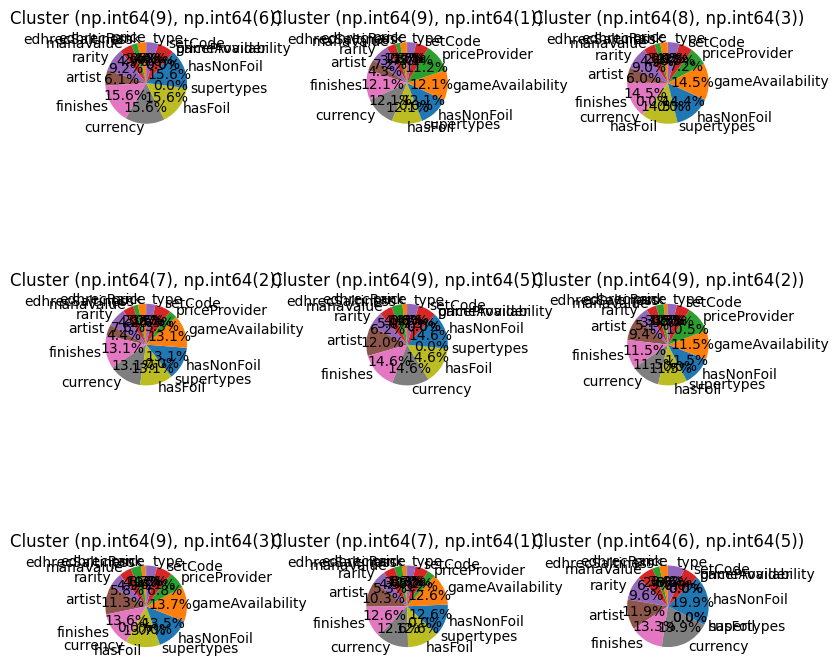

In [25]:

# Set up the figure
fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # 3 rows, 3 columns

# Create pie charts for each cluster
num_clusters = len(cluster_df)
for idx, (ax, (cluster, weights)) in enumerate(zip(axes.flat[0:], cluster_df.iterrows())):
    ax.pie(weights, labels=variable_names, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{cluster}')

# Hide unused subplots (if any)
for j in range(num_clusters + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

# Adjust layout
plt.tight_layout()
plt.show()

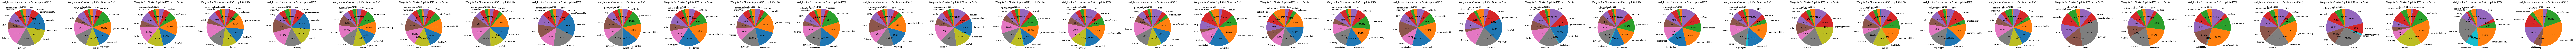

In [16]:

clusters = cluster_df.index

# Set up the pie charts
num_clusters = len(clusters)
fig, axes = plt.subplots(1, num_clusters, figsize=(5 * num_clusters, 5))

# Create a pie chart for each cluster
for ax, cluster in zip(axes, clusters):
    weights = cluster_df.loc[cluster]
    ax.pie(weights, labels=variable_names, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Weights for {cluster}')

# Adjust layout
plt.tight_layout()
plt.show()